## 迴歸分析

### 簡單線性迴歸

In [ ]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cathay_ml/master/data/salary.csv', index_col = 0 )
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


<Axes: xlabel='year', ylabel='salary'>

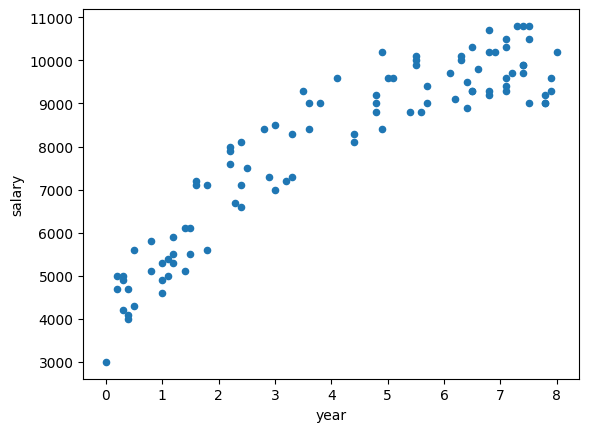

In [ ]:
df.plot(kind = 'scatter', x = 'year', y = 'salary')

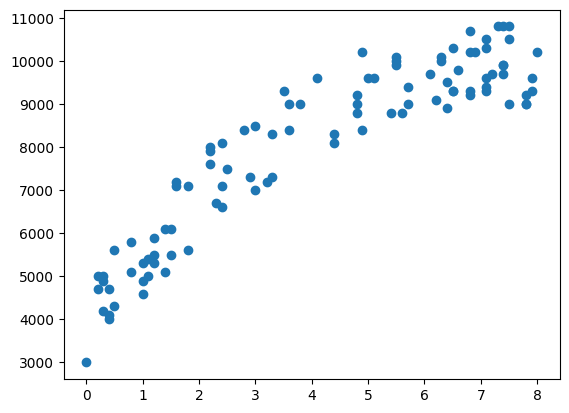

In [ ]:
from matplotlib import pyplot as plt
X = df['year']
y = df['salary']
plt.scatter(df['year'], df['salary'])

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(df[ ['year' ] ], df['salary'])

LinearRegression()

In [ ]:
import numpy as np
data = np.array([
          [2],
          [3]
          ])
regr.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6474.1981721 , 7186.79230825])

In [ ]:
regr.intercept_, regr.coef_

(5049.0098998138365, array([712.59413615]))

In [ ]:
pred_y = regr.predict(df[ ['year' ] ])

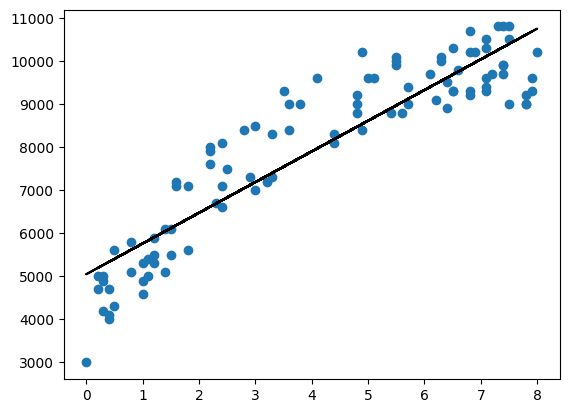

In [ ]:
from matplotlib import pyplot as plt
X = df['year']
y = df['salary']
plt.scatter(df['year'], df['salary'])
plt.plot(df['year'], pred_y, c = 'black')

### 練習題 1

請使用sklearn 的 Linear Regression 針對以下房屋資料利用 X 為 area, Y 為 price 建立模型，並且告訴我當房屋的坪數是 20 坪時，價格應為多少?

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/cathay_ml/master/data/rent_591_sample.csv',index_col=0)
df['price'] = df['price'].map(lambda e: int(e.replace(',','')))
df.head()

,id,address,floor,allfloor,layout,area,price,browsenum_all
0,6032971,永康街47巷永康街五樓頂加..,5,5,5房3廳3衛,46.8,60000,751
1,6054083,仁愛路四段仁愛路樹海景觀..,7,12,4房2廳2衛,76.9,100000,162
2,5957980,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,150000,2385
3,6043839,永康街23巷永康商圈..,3,4,2房1廳1衛,18.0,29000,1323
4,5181793,雲和街師大*已收訂..,5,5,2房2廳1衛,28.0,31800,2303


### 多元迴歸模型

In [ ]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cathay_ml/master/data/house-prices.csv')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [ ]:
df.isna().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [ ]:
df['Brick'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Neighborhood'].unique()

array(['East', 'North', 'West'], dtype=object)

In [ ]:
import pandas
brick = pandas.get_dummies(df['Brick'])
neighbor = pandas.get_dummies(df['Neighborhood'])

In [ ]:
house = pandas.concat([df, brick, neighbor], axis = 1)

In [ ]:
house.drop(['Home', 'Brick', 'Neighborhood', 'No', 'West'], axis = 1, inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
X = house[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East',
       'North']]
y = house['Price']
regr = LinearRegression()
regr.fit(X,y)

LinearRegression()

In [ ]:
pred_y = regr.predict(X)

In [ ]:
import numpy as np
data = np.array([
  [2000,3, 2, 1,1,0,0],
  [3000,4, 3, 1,1,1,1],
])
regr.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([166364.81702798, 188565.97640171])

In [ ]:
regr.coef_

array([    52.99374081,   4246.79389165,   7883.27849293,  -8267.48831831,
        17297.34952752, -22241.61647014, -20681.03735068])

In [ ]:
import statsmodels.api as sm
X2  = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           8.25e-50
Time:                        14:25:00   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.284e+04   1.02e+04      2.231      0.0

### 模型評估

In [ ]:
pred_y = regr.predict(X)
((pred_y - y) ** 2).sum() / len(y)

94105539.94603018

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred_y, y)

94105539.94603018

In [ ]:
from sklearn.metrics import r2_score
r2_score(pred_y, y)

0.8487499534899751

### AIC & BIC

In [ ]:
import itertools
list(itertools.combinations(X.columns, 7))

[('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North')]

In [ ]:

dic = {}
for i in range(7, 0, -1):
  for variables in itertools.combinations(X.columns, i):
    #print(list(predcols))
    predictors = X[list(variables)]
    predictors2 = sm.add_constant(predictors)
    est = sm.OLS(y, predictors2)
    res = est.fit()
    dic[variables] = res.aic

In [ ]:
sorted(dic.items(), key = lambda e:e[1] )[0]

(('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'),
 2729.3189814012494)

In [ ]:
from collections import Counter
c = Counter(dic)
c.most_common()[::-1][0]

(('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'),
 2729.3189814012494)

In [ ]:
from sklearn.feature_selection import RFE, RFECV
regr = LinearRegression()
selector = RFECV(regr, step=1)
selector = selector.fit(X, y)

In [ ]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1])

In [ ]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True])

### 練習題 2
請使用sklearn 的 Linear Regression 針對以下房屋資料利用 建立模型，並且產生該模型的 r2 & MSE?

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/cathay_ml/master/data/rent_591_sample.csv',index_col=0)
df['price'] = df['price'].map(lambda e: int(e.replace(',','')))
df[['bedroom', 'livingroom', 'bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')
df.dropna(inplace=True)
df['bedroom'] = df['bedroom'].astype(int)
df['bathroom'] = df['bathroom'].astype(int)
df['livingroom'] = df['livingroom'].astype(int)
df = df[['floor', 'allfloor', 'area', 'browsenum_all', 'bedroom', 'livingroom', 'bathroom', 'price']]
df.head()

,floor,allfloor,area,browsenum_all,bedroom,livingroom,bathroom,price
0,5,5,46.8,751,5,3,3,60000
1,7,12,76.9,162,4,2,2,100000
2,10,13,71.3,2385,4,2,2,150000
3,3,4,18.0,1323,2,1,1,29000
4,5,5,28.0,2303,2,2,1,31800


### Overfitting

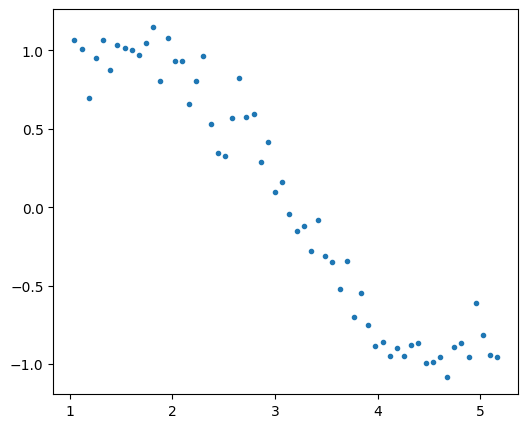

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 6, 5
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def linear_regression(data, power, models_to_plot):
    # Initialize predictors
    predictors = ['x']
    if power >= 2:
        predictors.extend(['x_%d' % i for i in range(2, power + 1)])

    # Initialize StandardScaler
    scaler = StandardScaler()

    # Fit and transform the predictors
    data_scaled = data.copy()
    data_scaled[predictors] = scaler.fit_transform(data[predictors])

    # Fit the model
    linreg = LinearRegression()
    linreg.fit(data_scaled[predictors], data['y'])
    y_pred = linreg.predict(data_scaled[predictors])

    # Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for power: %d' % power)

    # Return the result in pre-defined format
    rss = sum((y_pred - data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret


In [ ]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,1.065763,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,1.006086,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,0.695374,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.949799,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.063496,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


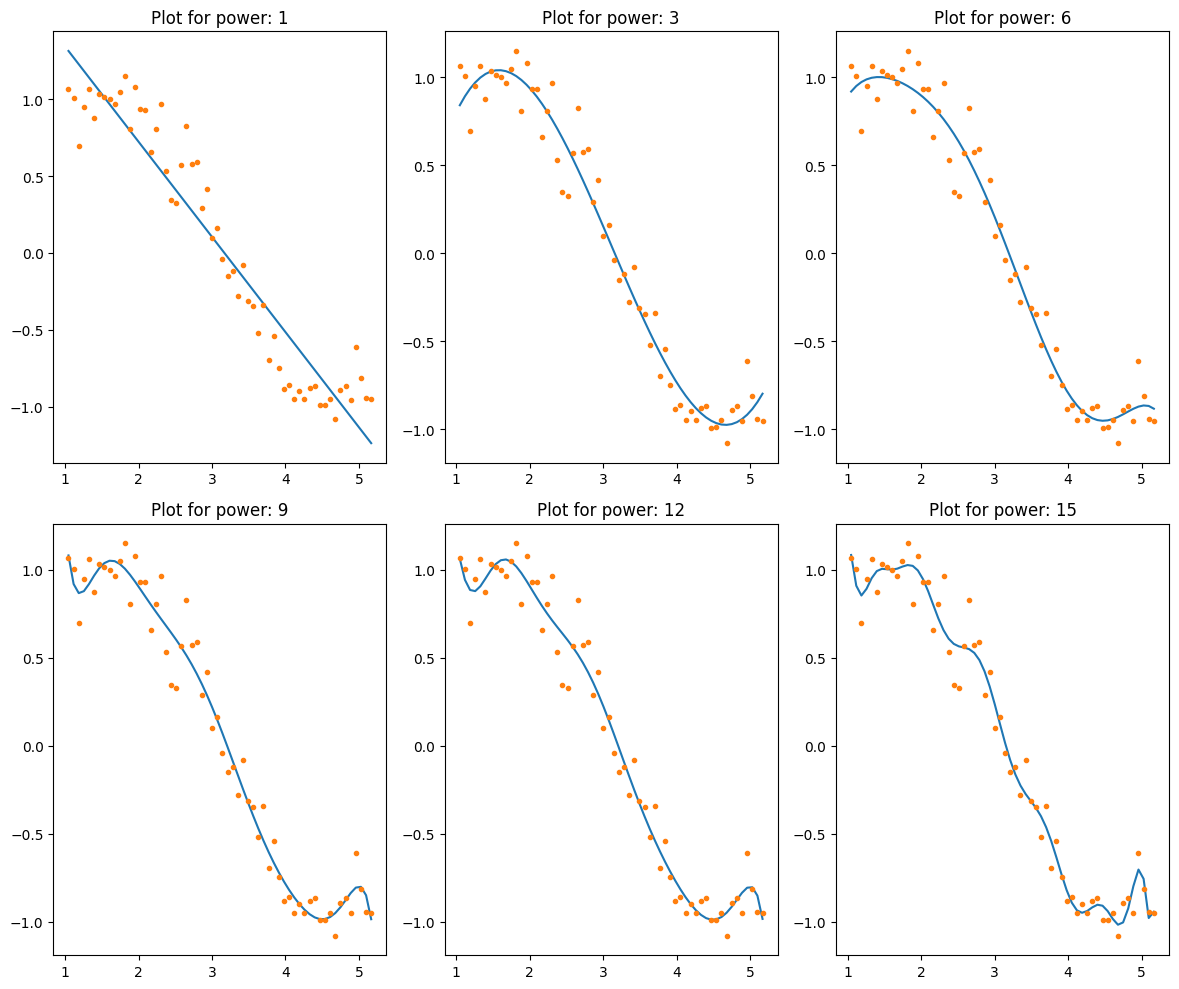

In [ ]:
rcParams['figure.figsize'] = 12, 10
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

### Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def ridge_regression(data, predictors, alpha, models_to_plot={}):
    # Initialize StandardScaler
    scaler = StandardScaler()

    # Fit and transform the predictors
    data_scaled = data.copy()
    data_scaled[predictors] = scaler.fit_transform(data[predictors])

    # Fit the model
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(data_scaled[predictors], data['y'])
    y_pred = ridgereg.predict(data_scaled[predictors])

    # Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for alpha: %.3g' % alpha)

    # Return the result in pre-defined format
    rss = sum((y_pred - data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret


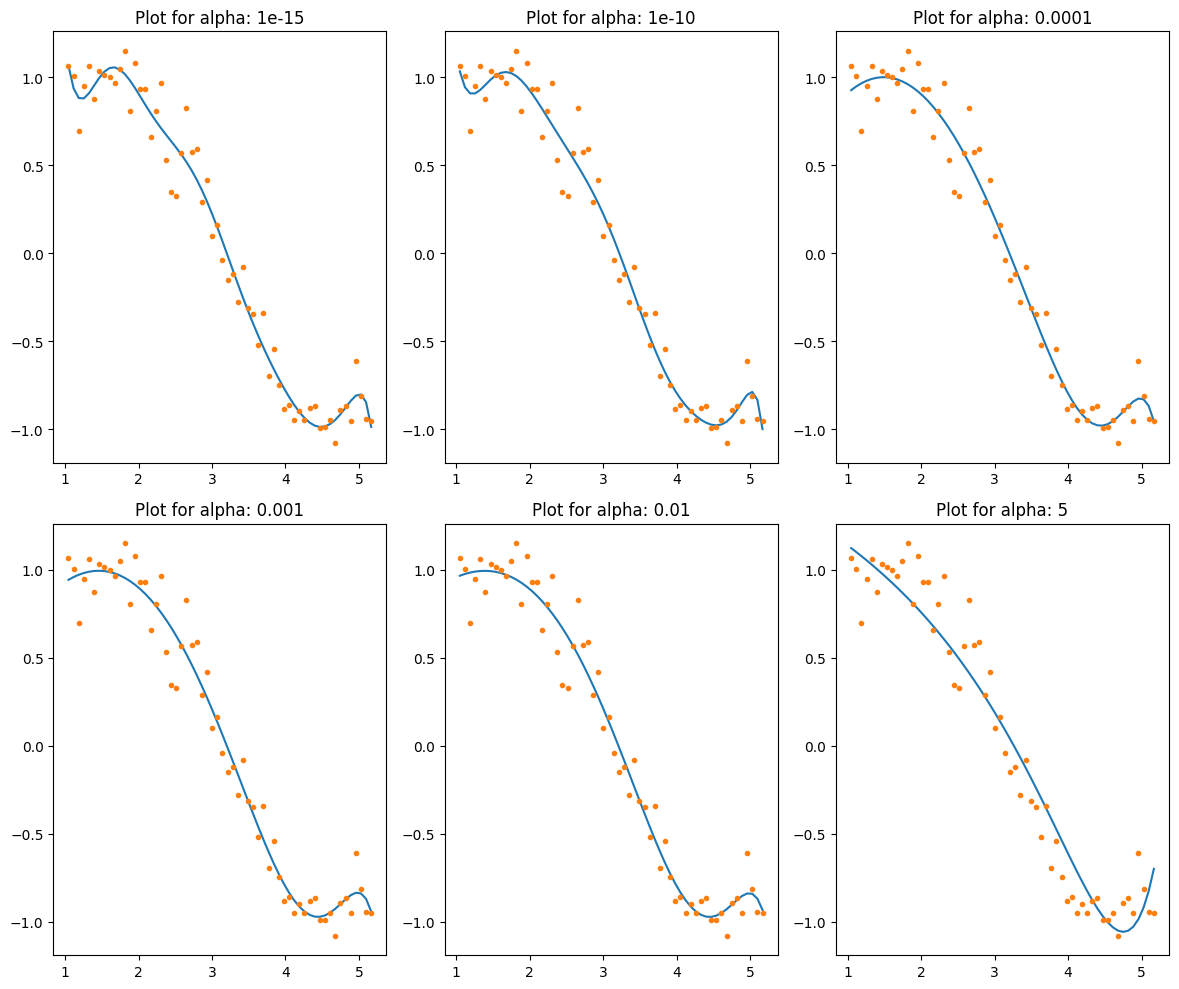

In [ ]:
import pandas as pd
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [ ]:
coef_matrix_simple.iloc[[-1], :]

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_15,0.704839,0.038032,294843.885974,-5687481.894171,55197320.872983,-346346810.652339,1536725095.808929,-5030432365.419454,12417524421.053049,-23345609838.309738,33463828225.861248,-36302915375.821495,29292365073.123455,-17029498808.200171,6738938466.767931,-1624263067.594646,179880294.687003


In [ ]:
coef_matrix_ridge.loc[['alpha_0.01'],:]

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_0.01,0.963726,0.038032,0.604839,-0.89069,-1.001363,-0.602379,-0.156591,0.178452,0.382048,0.474821,0.481383,0.4203,0.303634,0.138796,-0.069644,-0.318664,-0.605987


### Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def lasso_regression(data, predictors, alpha, models_to_plot={}):
    # Initialize StandardScaler
    scaler = StandardScaler()

    # Fit and transform the predictors
    data_scaled = data.copy()
    data_scaled[predictors] = scaler.fit_transform(data[predictors])

    # Fit the model
    lassoreg = Lasso(alpha=alpha, max_iter=10000)
    lassoreg.fit(data_scaled[predictors], data['y'])
    y_pred = lassoreg.predict(data_scaled[predictors])

    # Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for alpha: %.3g' % alpha)

    # Return the result in pre-defined format
    rss = sum((y_pred - data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.805e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.805e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.801e-01, tolerance: 3.695e

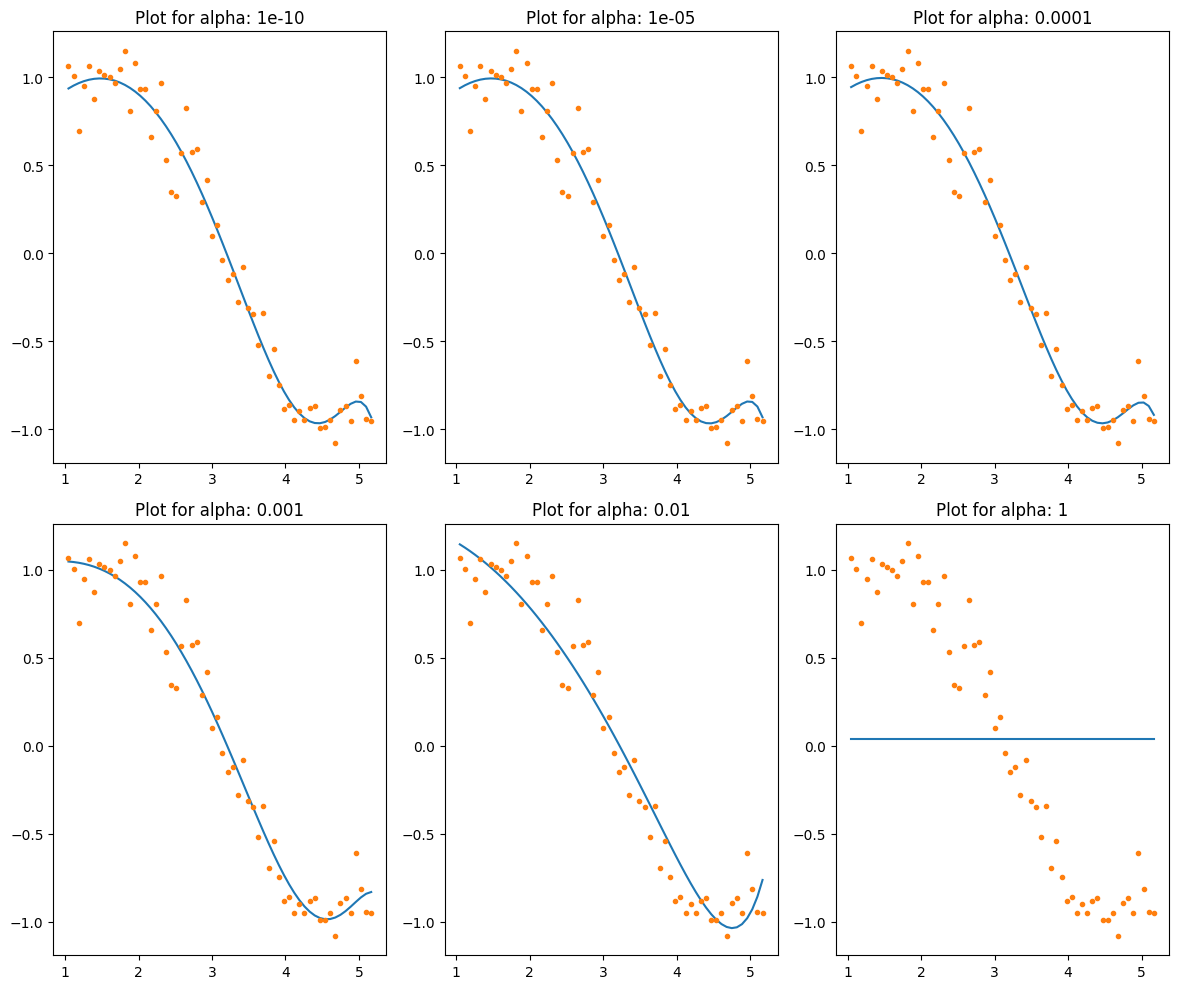

In [ ]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [ ]:
coef_matrix_simple.iloc[[-1], :]

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_15,0.704839,0.038032,294843.885974,-5687481.894171,55197320.872983,-346346810.652339,1536725095.808929,-5030432365.419454,12417524421.053049,-23345609838.309738,33463828225.861248,-36302915375.821495,29292365073.123455,-17029498808.200171,6738938466.767931,-1624263067.594646,179880294.687003


In [ ]:
# ridge, l2, regularization, dimension reduction
coef_matrix_ridge.loc[['alpha_0.01'],:]

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_0.01,0.963726,0.038032,0.604839,-0.89069,-1.001363,-0.602379,-0.156591,0.178452,0.382048,0.474821,0.481383,0.4203,0.303634,0.138796,-0.069644,-0.318664,-0.605987


In [ ]:
# lasso, l1 regularization, dimension selection
coef_matrix_lasso.loc[['alpha_0.01'],:]

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_0.01,1.709275,0.038032,-0.0,-0.946424,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.130349,0.149027,0.0,0.0,0.0


### 共線性

In [ ]:
import pandas as pd
from statsmodels.api import OLS

data = {
    'Category': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Response': [1, 2, 3, 2, 3, 1, 3, 1, 2]
}

df = pd.DataFrame(data)

# 建立虛擬變數
dummies = pd.get_dummies(df['Category'])

# 將虛擬變數添加到DataFrame
df_with_dummies = pd.concat([df, dummies], axis=1)

df_with_dummies.head()


,Category,Response,A,B,C
0,A,1,1,0,0
1,B,2,0,1,0
2,C,3,0,0,1
3,A,2,1,0,0
4,B,3,0,1,0


In [ ]:
# 定義自變數與依變數
X = df_with_dummies[['A', 'B', 'C']]  # 使用 A 、 B 和 C 作為自變數
y = df_with_dummies['Response']  # 依變數

# 建立線性回歸模型
model = OLS(y, X).fit()

# 輸出模型摘要
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.333
Method:                 Least Squares   F-statistic:                     0.000
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               1.00
Time:                        14:18:07   Log-Likelihood:                -10.946
No. Observations:                   9   AIC:                             27.89
Df Residuals:                       6   BIC:                             28.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A              2.0000      0.577      3.464      0.013       0.587       3.413
B              2.0000      0.577      3.464      0.013       0.587       3.413
C              2.0000      0.577      3.464      0.013       0.587       3.413
==============================================================================
Omnibus:                        3.417   Durbin-Watson:                   2.833
Prob(Omnibus):                  0.181   Jarque-Bera (JB):                0.844
Skew:                           0.000   Prob(JB):                        0.656
Kurtosis:                       1.500   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 移除一個虛擬變數 (這裡移除 'C')
df_reduced = df_with_dummies.drop('C', axis=1)

# 定義自變數與依變數
X = df_reduced[['A', 'B']]  # 使用 A 和 B 作為自變數
y = df_reduced['Response']  # 依變數

# 建立線性回歸模型
model = OLS(y, X).fit()

# 輸出模型摘要
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Response   R-squared (uncentered):                   0.571
Model:                            OLS   Adj. R-squared (uncentered):              0.449
Method:                 Least Squares   F-statistic:                              4.667
Date:                Sun, 10 Dec 2023   Prob (F-statistic):                      0.0515
Time:                        14:24:41   Log-Likelihood:                         -15.890
No. Observations:                   9   AIC:                                      35.78
Df Residuals:                       7   BIC:                                      36.17
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A              2.0000      0.926      2.160      0.068      -0.189       4.189
B              2.0000      0.926      2.160      0.068      -0.189       4.189
==============================================================================
Omnibus:                        0.284   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.868   Jarque-Bera (JB):                0.360
Skew:                           0.305   Prob(JB):                        0.835
Kurtosis:                       2.235   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""